In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon, Point
import pandas as pd

import numpy as np
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == 'Europe']

tmp = [x.replace(')','') for x in str(europe.loc[43,'geometry']).split('((')[1:]][1]
tmp2 = [x.split(' ') for x in tmp.split(', ')][:-1]
tmp3 = [(float(x[0]),float(x[1])) for x in tmp2]
France_mainland = Polygon(tmp3)
europe.loc[europe['name']=='France','geometry'] = France_mainland 

In [24]:
df_data = pd.read_csv("drinks.csv")

df_data = df_data.replace({
    "country": {
        "Czech Republic": "Czechia",
        "Bosnia-Herzegovina": "Bosnia and Herz.",
        "Macedonia": "North Macedonia"
    }
})


# https://data.world/anair5/alcohol-v-life-expectancy
df_data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.000000
1,Albania,89,132,54,4.879627
2,Algeria,25,0,14,0.692020
3,Andorra,245,138,312,12.332149
4,Angola,217,57,45,5.660368


In [34]:
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# http://bboxfinder.com
bbox = make_bbox(-17.578125,33.302626,33.046875,63.863700 )

bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

#europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#europe = europe[europe.continent == 'Europe']
europe = europe.overlay(bbox_gdf, how="intersection")

In [25]:
europe = europe.merge(df_data, left_on="name", right_on="country")

populations = {
    "Norway": 5.4,
    "France": 67.8,
    "Sweden": 10.4,
    "Belarus": 9.4,
    "Ukraine": 41.3,  # Note: This figure might be outdated due to recent events affecting population counts.
    "Poland": 38,
    "Austria": 9,
    "Hungary": 9.6,
    "Moldova": 2.6,
    "Romania": 19.2,
    "Lithuania": 2.8,
    "Latvia": 1.9,
    "Estonia": 1.3,
    "Germany": 83,
    "Bulgaria": 6.9,
    "Greece": 10.4,
    "Albania": 2.8,
    "Croatia": 4,
    "Switzerland": 8.7,
    "Luxembourg": 0.634,
    "Belgium": 11.5,
    "Netherlands": 17.5,
    "Portugal": 10.3,
    "Spain": 47,
    "Ireland": 5.0,
    "Italy": 59.6,
    "Denmark": 5.8,
    "United Kingdom": 68,
    "Iceland": 0.366,
    "Slovenia": 2.1,
    "Finland": 5.5,
    "Slovakia": 5.5,
    "Czechia": 10.7,
    "Bosnia and Herz.": 3.3,
    "North Macedonia": 2.1,
    "Serbia": 6.9,
    "Montenegro": 0.622
}

europe = europe.merge(
    pd.DataFrame(populations.items(), columns=["name", "population"]),
    on="name"
)

europe["total_units_of_beer"] = europe["population"] * europe["beer_servings"]

europe

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,total_units_of_beer
0,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",Norway,169,71,129,6.547573,5.400,912.600
1,67059887.0,Europe,France,FRA,2715518,"POLYGON ((6.18632 49.46380, 6.65823 49.20196, ...",France,127,151,370,11.498177,67.800,8610.600
2,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,152,60,186,7.062152,10.400,1580.800
3,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",Belarus,142,373,42,9.883464,9.400,1334.800
4,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...",Ukraine,206,237,45,8.659121,41.300,8507.800
5,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",Poland,343,215,56,10.894877,38.000,13034.000
6,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,279,75,191,9.670535,9.000,2511.000
7,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,234,215,185,11.249759,9.600,2246.400
8,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",Moldova,109,226,18,6.263667,2.600,283.400
9,19356544.0,Europe,Romania,ROU,250077,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",Romania,297,122,167,10.398043,19.200,5702.400


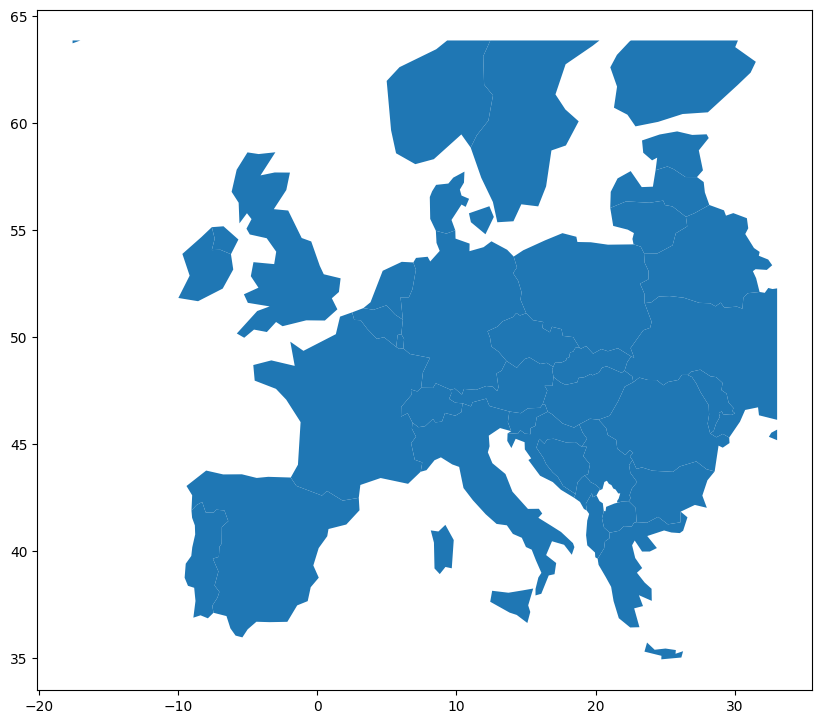

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
europe.plot(ax=ax)
plt.show()

37it [02:28,  4.01s/it]


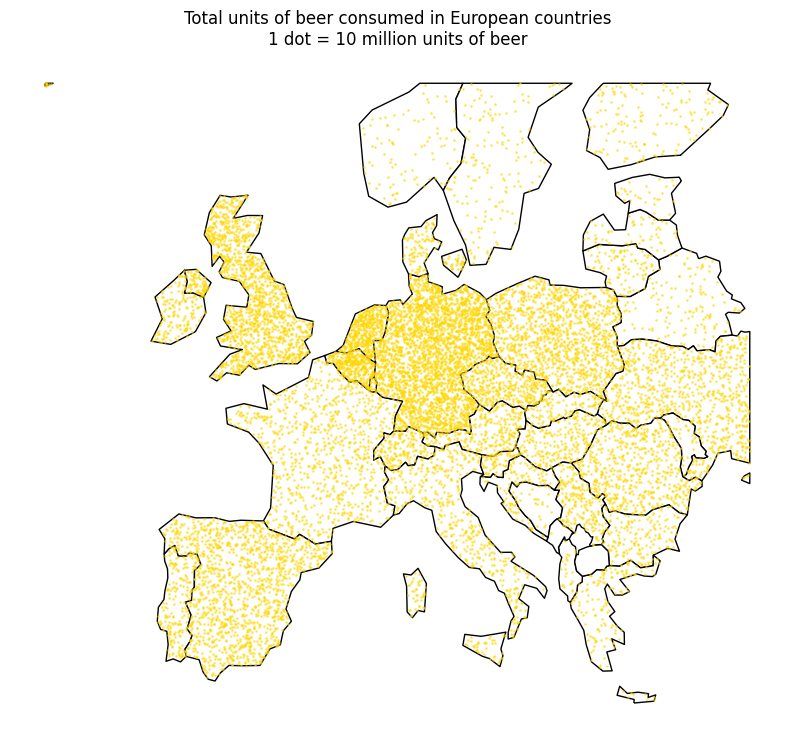

In [36]:
def generate_random_points(poly, num_points):
    points = []
    min_x, min_y, max_x, max_y = poly.bounds
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if random_point.within(poly):
            points.append(random_point)
    return points

dots = gpd.GeoDataFrame(columns=['geometry'])

for _, row in tqdm(europe.iterrows()):
    num_points = int(row['total_units_of_beer'] / 10)
    points = generate_random_points(row['geometry'], num_points)
    for point in points:
        dots = dots.append({'geometry': point}, ignore_index=True)

dots.crs = europe.crs

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
europe.plot(ax=ax, color='white', edgecolor='black')
dots.plot(ax=ax, markersize=1, color='gold', alpha=0.5)

ax.set_title("Total units of beer consumed in European countries\n1 dot = 10 million units of beer")

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

plt.show()

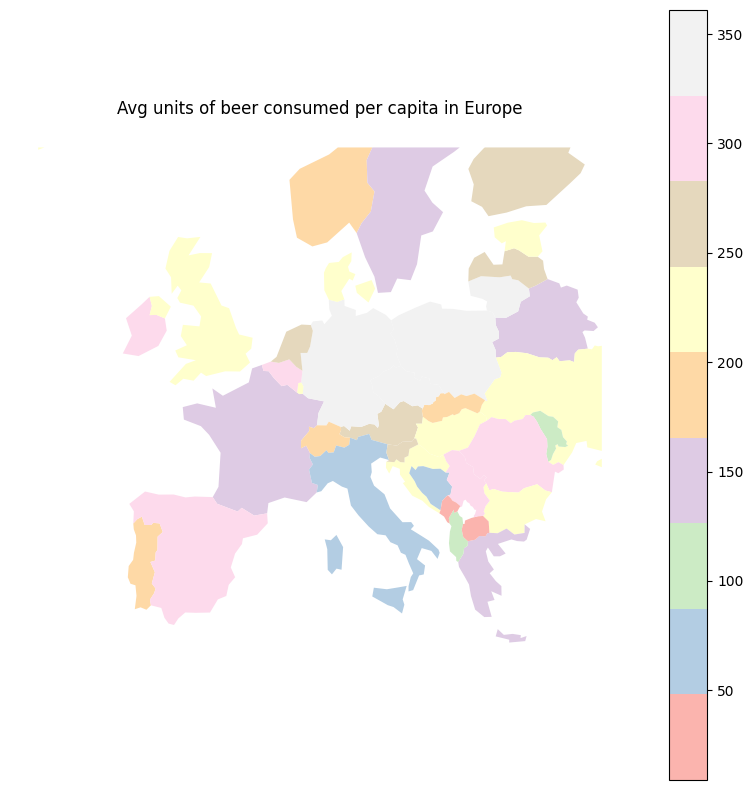

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
europe.plot(column='beer_servings', cmap='Pastel1', legend=True, ax=ax)

ax.set_title("Avg units of beer consumed per capita in Europe")

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

plt.show()

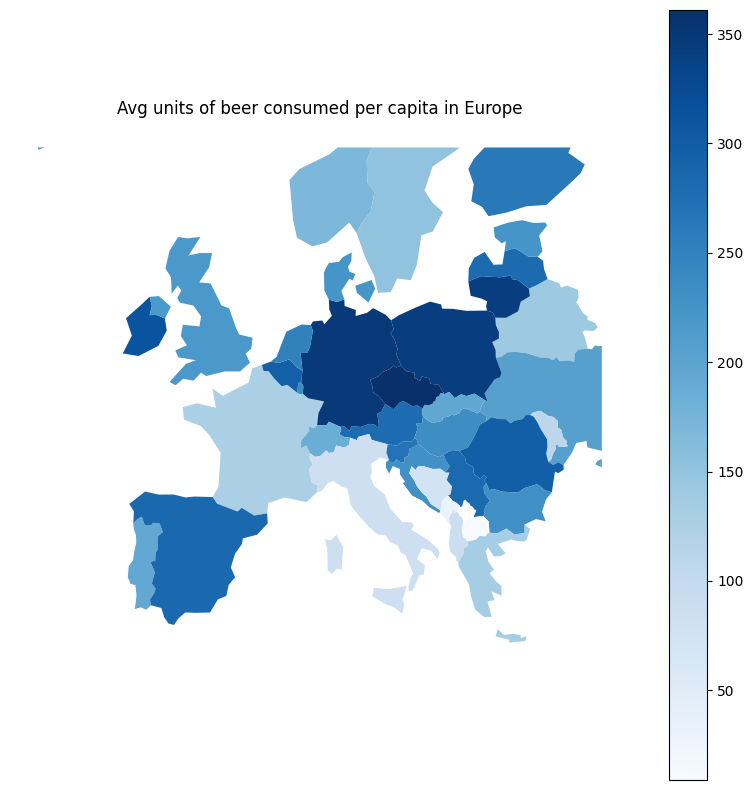

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
europe.plot(column='beer_servings', cmap='Blues', legend=True, ax=ax)

ax.set_title("Avg units of beer consumed per capita in Europe")

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

plt.show()

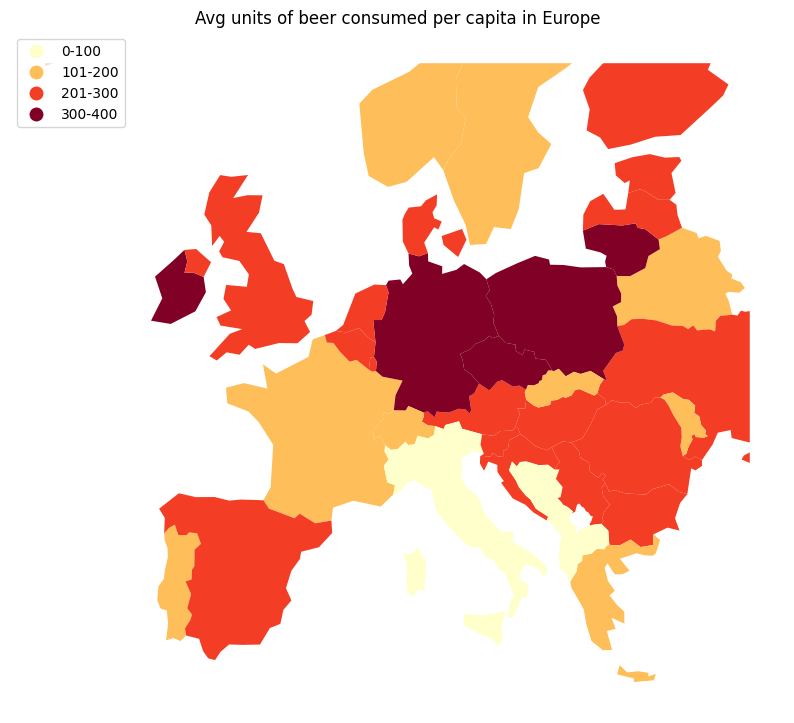

In [43]:
bins = [0, 100, 200, 300, 400]
labels = ['0-100', '101-200', '201-300', "300-400"]
europe['beer_servings_category'] = pd.cut(europe['beer_servings'], bins=bins, labels=labels)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
europe.plot(column='beer_servings_category', cmap='YlOrRd', legend=True, ax=ax, categorical=True, legend_kwds={'loc': 'upper left'})

ax.set_title("Avg units of beer consumed per capita in Europe")

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

plt.show()

In [45]:
world = world.merge(df_data, left_on="name", right_on="country")

<AxesSubplot:xlabel='beer_servings', ylabel='spirit_servings'>

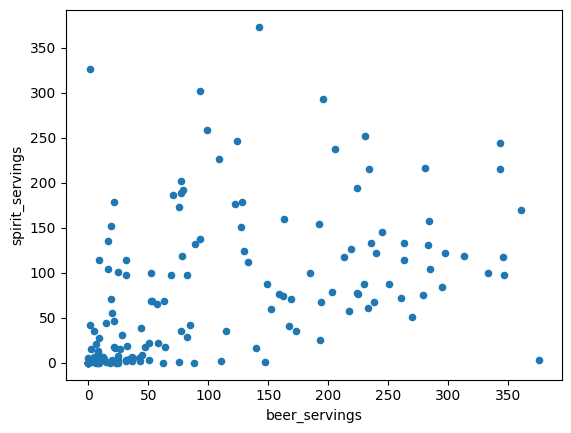

In [46]:
world.plot.scatter(x="beer_servings", y="spirit_servings")

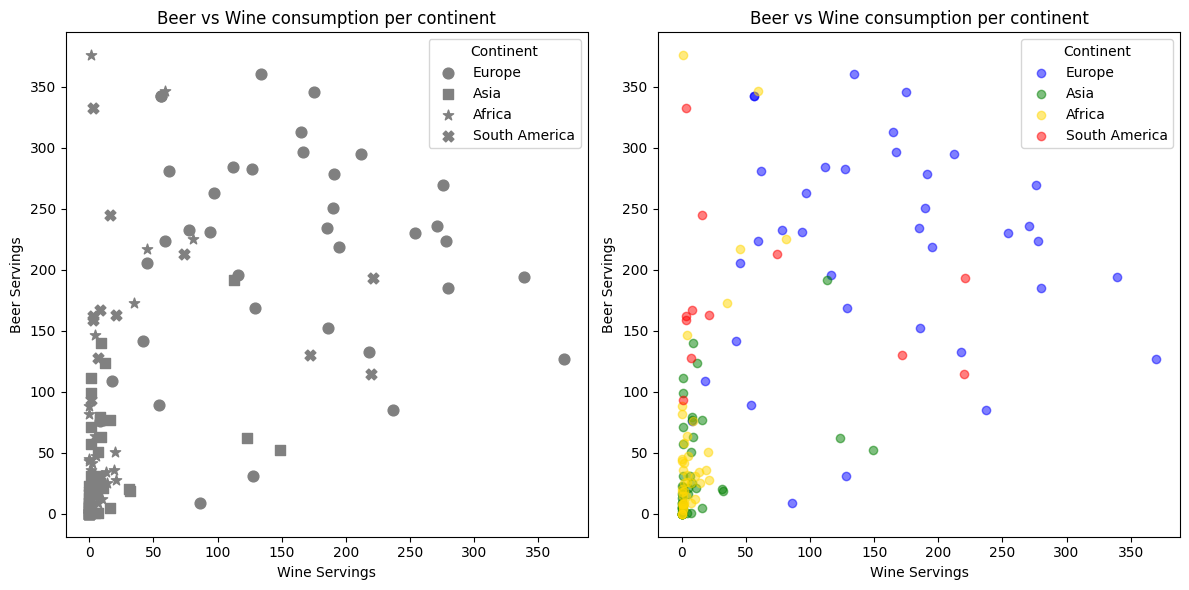

In [54]:
colors = {'Europe': 'blue', 'Asia': 'green', "Africa": "gold", "South America": "red"}
markers = {'Europe': 'o', 'Asia': 's', "Africa": "*", "South America": "X"}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for group in ["Europe", "Asia", "Africa", "South America"]:
    group_df = world[world['continent'] == group]
    ax1.scatter(
        group_df['wine_servings'],
        group_df['beer_servings'], 
        color='gray',
        marker=markers[group],
        label=group,
        s=60
    )
ax1.set_title('Beer vs Wine consumption per continent')
ax1.set_xlabel('Wine Servings')
ax1.set_ylabel('Beer Servings')
ax1.legend(title='Continent')

for group in ["Europe", "Asia", "Africa", "South America"]:
    group_df = world[world['continent'] == group]
    ax2.scatter(
        group_df['wine_servings'],
        group_df['beer_servings'], 
        color=colors[group],
        alpha=0.5,
        marker='o',
        label=group
    )
ax2.set_title('Beer vs Wine consumption per continent')
ax2.set_xlabel('Wine Servings')
ax2.set_ylabel('Beer Servings')
ax2.legend(title='Continent')

plt.tight_layout()
plt.show()


In [88]:
world[world["name"] == "Hungary"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
101,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,234,215,185,11.249759


In [55]:
def most_popular_drink(df):
    drinks = ['beer_servings', 'spirit_servings', 'wine_servings']
    df['most_popular'] = df[drinks].idxmax(axis=1)
    return df

most_popular_drink = most_popular_drink(europe)
most_popular_drink["most_popular"] = most_popular_drink["most_popular"].str.rstrip("serving").str.rstrip("_")
most_popular_drink.head()

,pop_est,continent,name,iso_a3,gdp_md_est,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,total_units_of_beer,beer_servings_category,geometry,most_popular
0,5347896.0,Europe,Norway,NOR,403336,Norway,169,71,129,6.547573,5.4,912.6,101-200,"POLYGON ((11.99206 61.80036, 12.63115 61.29357...",beer
1,67059887.0,Europe,France,FRA,2715518,France,127,151,370,11.498177,67.8,8610.6,101-200,"POLYGON ((8.09928 49.01778, 7.59368 48.33302, ...",wine
2,10285453.0,Europe,Sweden,SWE,530883,Sweden,152,60,186,7.062152,10.4,1580.8,101-200,"POLYGON ((12.30037 60.11793, 12.63115 61.29357...",wine
3,9466856.0,Europe,Belarus,BLR,63080,Belarus,142,373,42,9.883464,9.4,1334.8,101-200,"POLYGON ((29.37157 55.67009, 29.89629 55.78946...",spirit
4,44385155.0,Europe,Ukraine,UKR,153781,Ukraine,206,237,45,8.659121,41.3,8507.8,201-300,"MULTIPOLYGON (((32.63080 45.51919, 33.04688 45...",spirit


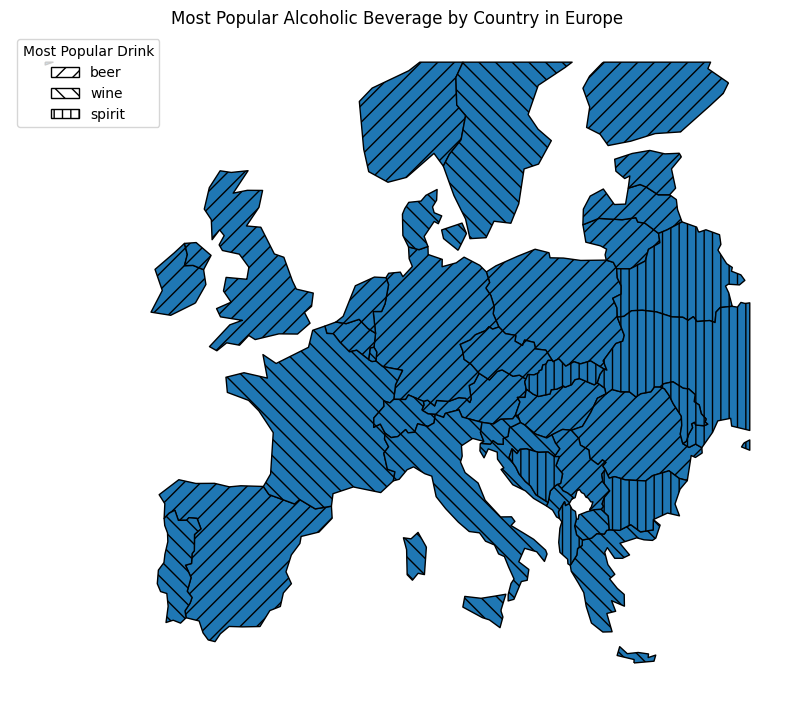

In [83]:
from matplotlib.patches import Patch

hatch_patterns = {
    'beer': '//',
    'wine': "\\\\",
    'spirit': '||',
}

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for drink, pattern in hatch_patterns.items():
    most_popular_drink[most_popular_drink['most_popular'] == drink].plot(ax=ax, hatch=pattern, edgecolor='black', label=drink)

legend_labels = [Patch(facecolor='white', edgecolor='black', hatch=hatch_patterns[drink], label=drink) for drink in hatch_patterns]
ax.legend(handles=legend_labels, title='Most Popular Drink', loc="upper left")

ax.set_title('Most Popular Alcoholic Beverage by Country in Europe')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

plt.show()


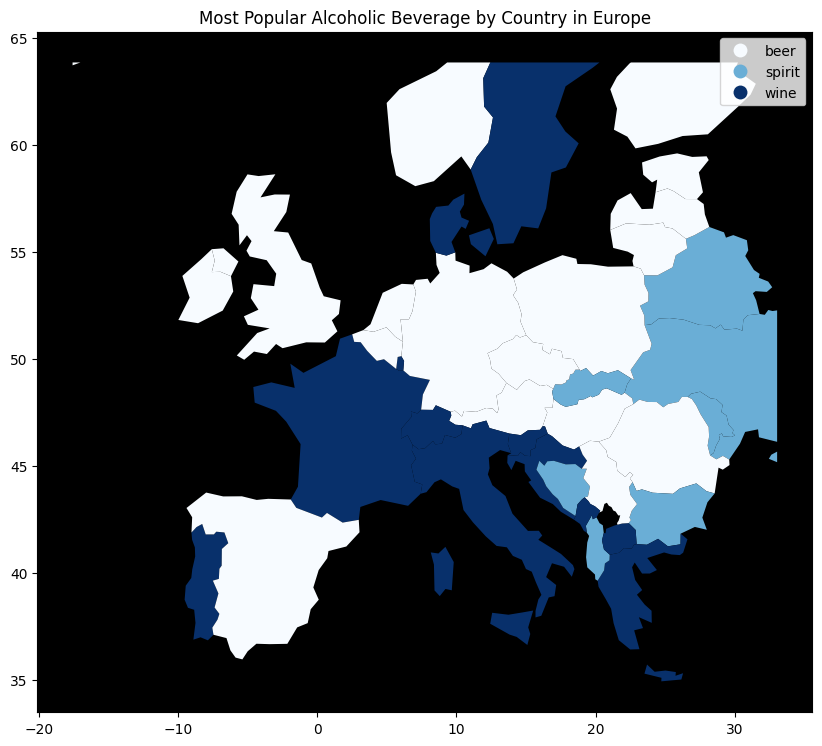

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
most_popular_drink.plot(column='most_popular', cmap='Blues', legend=True, ax=ax)
ax.set_title('Most Popular Alcoholic Beverage by Country in Europe')
ax.set_facecolor('black')  # You can choose any color you like
plt.show()

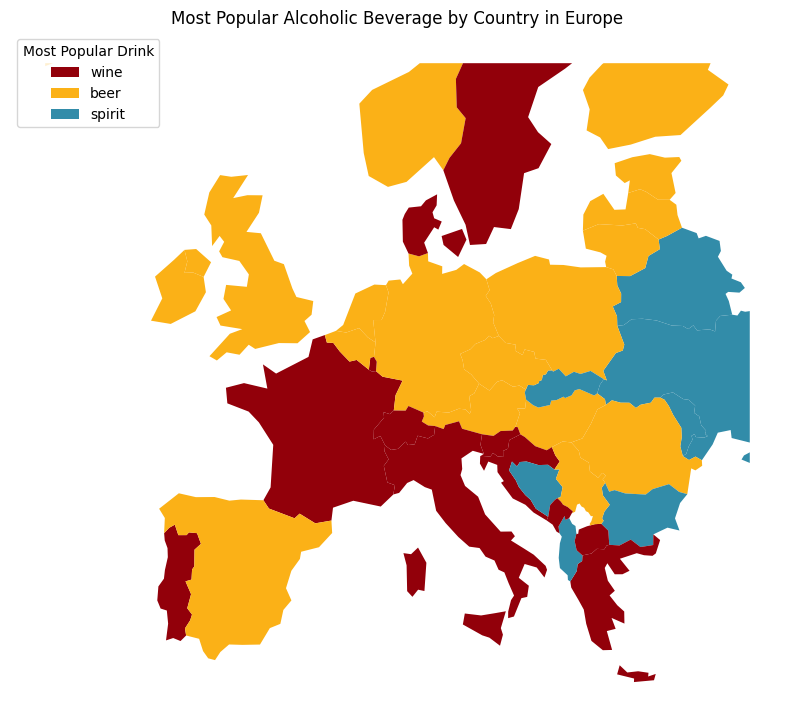

In [85]:
import matplotlib.pyplot as plt
import geopandas as gpd  # Assuming 'most_popular_drink' is a GeoDataFrame

# Define a color for each drink
color_map = {
    'wine': '#92000A',
    'beer': '#FBB117',
    'spirit': '#328CA9'
}

colors = most_popular_drink['most_popular'].map(color_map)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

most_popular_drink.plot(color=colors, legend=True, ax=ax)

from matplotlib.patches import Patch
legend_labels = [Patch(facecolor=color_map[drink], label=drink) for drink in color_map]
ax.legend(handles=legend_labels, title='Most Popular Drink', loc="upper left")

ax.set_title('Most Popular Alcoholic Beverage by Country in Europe')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

plt.show()

In [ ]:
# https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=XC-HU

In [60]:
inflation_df = pd.read_excel("inflation_data.xls", header=3)
inflation_df_t = inflation_df[["Country Name"] + [str(x) for x in range(2002, 2023)]].set_index("Country Name").T

eu_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czechia",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovak Republic",
    "Slovenia",
    "Spain",
    "Sweden"
]


europe_inflation_t = inflation_df_t[eu_countries]

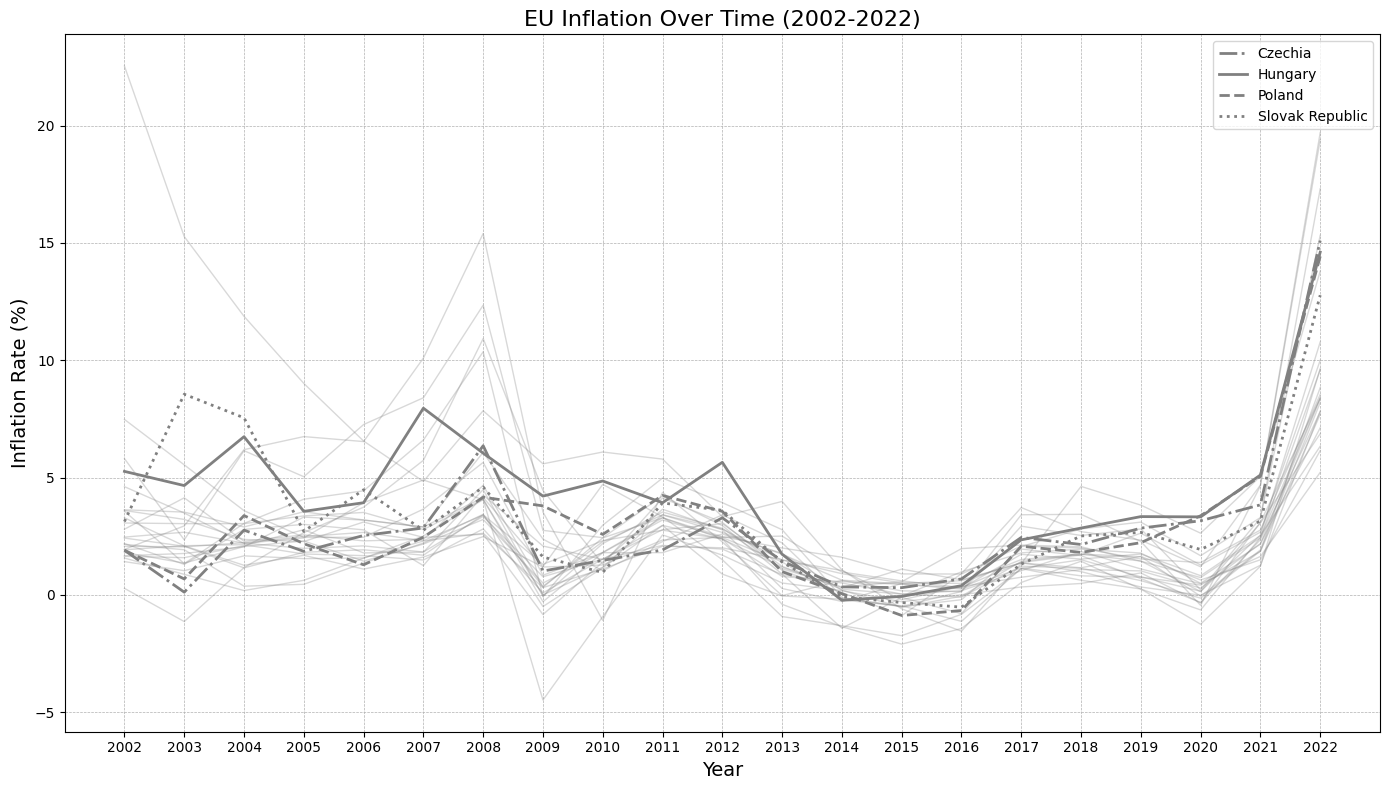

In [80]:
fig, ax = plt.subplots(figsize=(14, 8))

for column in europe_inflation_t.columns:
    if column == 'Hungary':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', ls="-")
    elif column == 'Czechia':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', ls="-.")
    elif column == 'Slovak Republic':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', ls=":")
    elif column == 'Poland':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', ls="--")
    else:
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label='_nolegend_', linewidth=1, color='grey', alpha=0.3)

ax.set_title('EU Inflation Over Time (2002-2022)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Inflation Rate (%)', fontsize=14)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

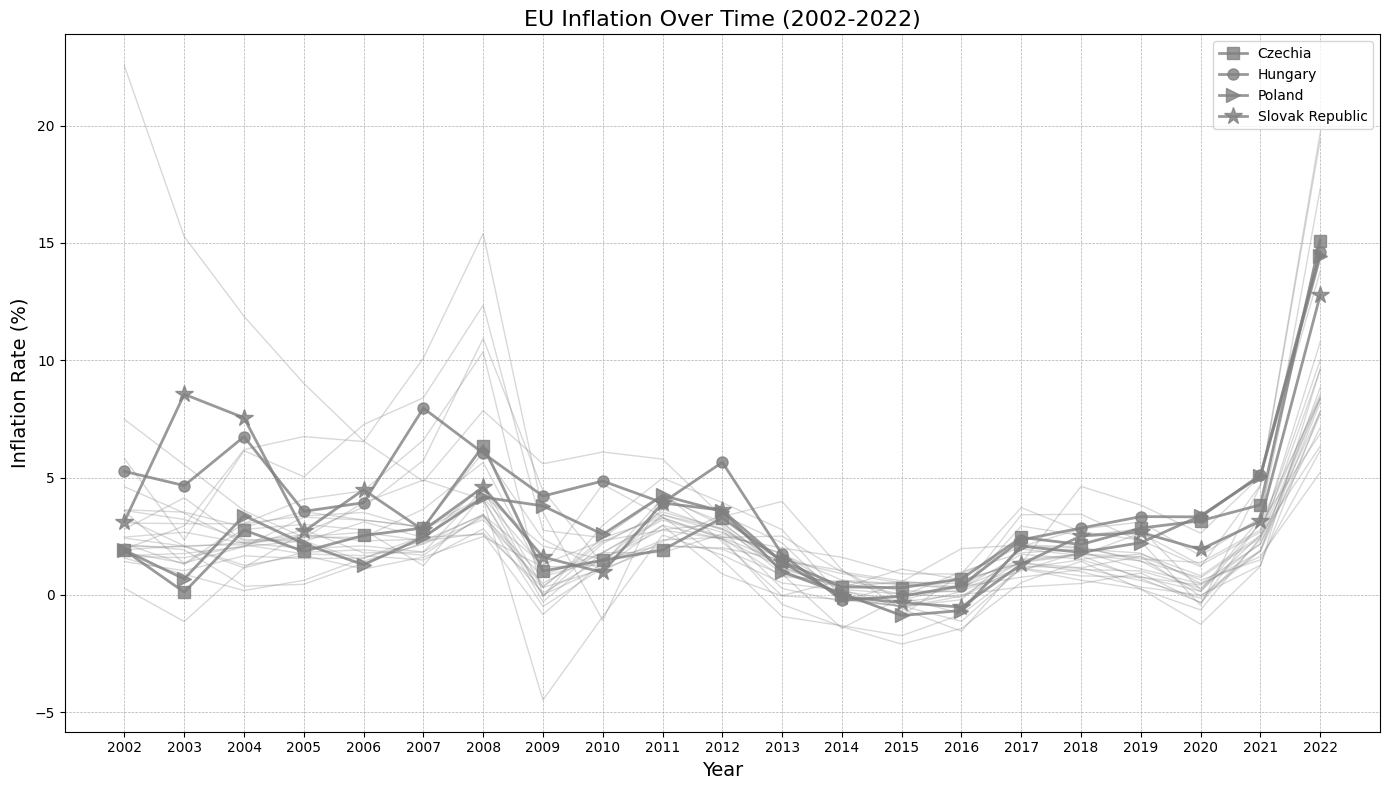

In [74]:
fig, ax = plt.subplots(figsize=(14, 8))

for column in europe_inflation_t.columns:
    if column == 'Hungary':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', marker="o", markersize=8, alpha=0.8)
    elif column == 'Czechia':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', marker="s", markersize=8, alpha=0.8)
    elif column == 'Slovak Republic':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', marker="*", markersize=13, alpha=0.8)
    elif column == 'Poland':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='grey', marker=">", markersize=10, alpha=0.8)
    else:
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label='_nolegend_', linewidth=1, color='grey', alpha=0.3)

ax.set_title('EU Inflation Over Time (2002-2022)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Inflation Rate (%)', fontsize=14)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

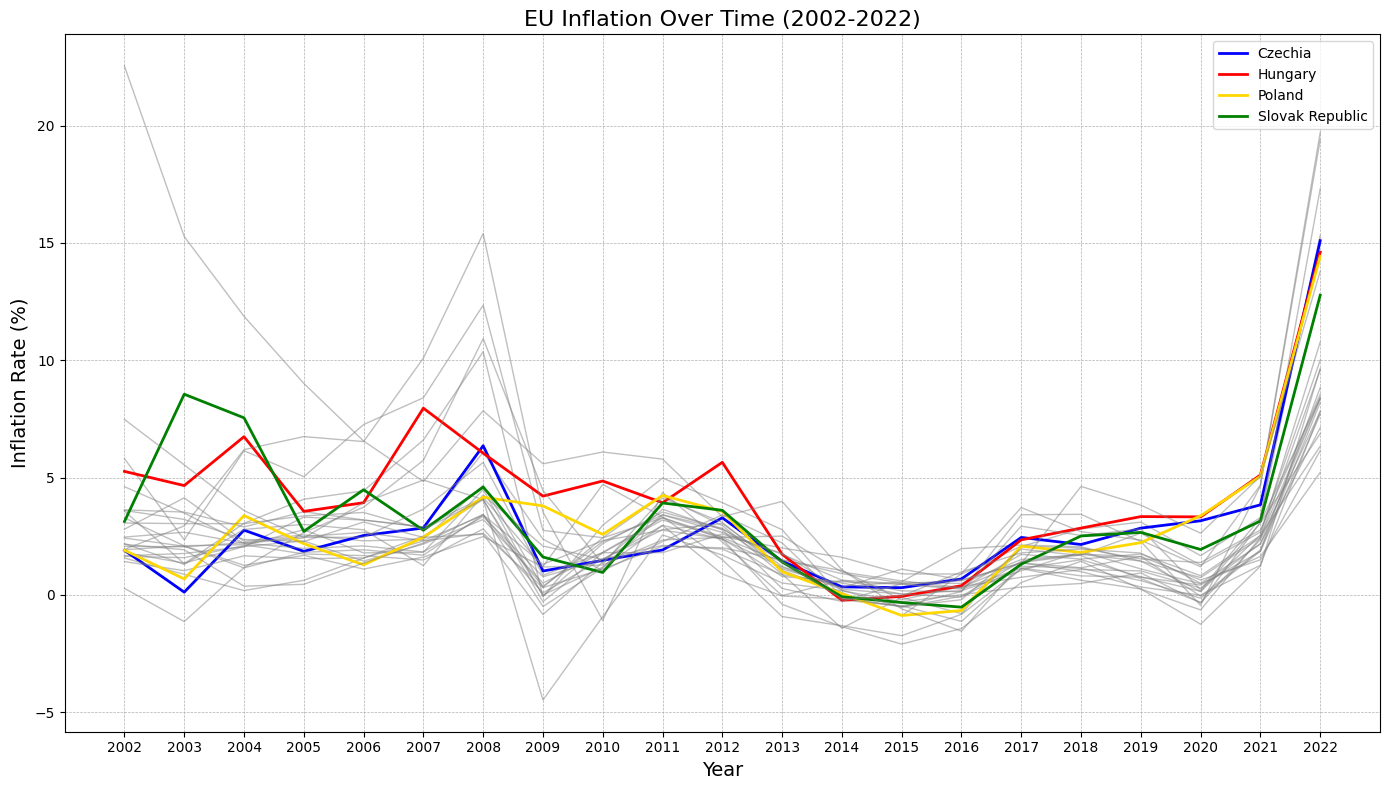

In [77]:
fig, ax = plt.subplots(figsize=(14, 8))

for column in europe_inflation_t.columns:
    if column == 'Hungary':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='red')
    elif column == 'Czechia':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='blue')
    elif column == 'Slovak Republic':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='green')
    elif column == 'Poland':
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label=column, linewidth=2, color='gold')
    else:
        ax.plot(europe_inflation_t.index, europe_inflation_t[column], label='_nolegend_', linewidth=1, color='grey', alpha=0.5)

ax.set_title('EU Inflation Over Time (2002-2022)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Inflation Rate (%)', fontsize=14)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [120]:
import matplotlib.pyplot as plt
import numpy as np


class BubbleChart:
    def __init__(self, area, bubble_spacing=0, uniform_size=False):
        area = np.asarray(area)
        self.uniform_size = uniform_size
        
        # If uniform_size is True, set all radii to a constant, else calculate from area
        if self.uniform_size:
            r = np.sqrt(np.full(area.shape, np.mean(area)) / np.pi)
        else:
            r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3])

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0], bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        new_point1 = self.bubbles[i, :2] + orth * self.step_dist
                        new_point2 = self.bubbles[i, :2] - orth * self.step_dist
                        dist1 = self.center_distance(self.com, np.array([new_point1]))
                        dist2 = self.center_distance(self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, values, colors, color_override=None, plot_values=True):
        # Normalize values for alpha representation
        
        norm_values = (values - np.min(values)) / (np.max(values) - np.min(values))
        
        for i, (x, y, r, value) in enumerate(self.bubbles):
            color = colors[i]
            label_color = 'white' if color == 'black' and color_override is None else 'black'
            # Adjust alpha based on normalized value if uniform_size is True
            alpha = norm_values[i] if self.uniform_size else 1.0
            circ = plt.Circle((x, y), r, color=color if color_override is None else color_override, alpha=alpha)
            ax.add_patch(circ)
            if plot_values:
                ax.text(x, y, f"{color}\n{str(int(value))}", color=label_color, ha='center', va='center', fontsize=9 if self.uniform_size else 12)
            else:
                ax.text(x, y, f"{color}", color=label_color, ha='center', va='center', fontsize=9 if self.uniform_size else 12)

                
                

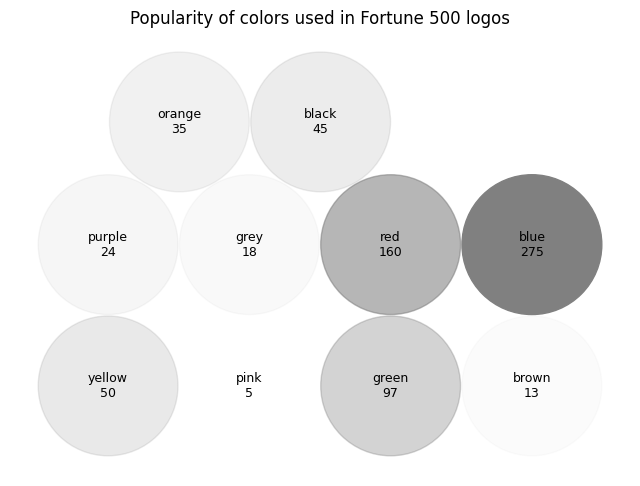

In [112]:
import random

browser_market_share = {
    'color_names': ['Blue', 'Red', 'Green', 'Yellow', 'Black', 'Orange', 'Purple', 'Grey', 'Brown', 'Pink'],
    'value': [275, 160, 97, 50, 45, 35, 24, 18, 13, 5],
    'color': [c.lower() for c in ['Blue', 'Red', 'Green', 'Yellow', 'Black', 'Orange', 'Purple', 'Grey', 'Brown', 'Pink']]
}

combined_list = list(zip(browser_market_share['color_names'], browser_market_share['value'], browser_market_share['color']))

# Shuffle the combined list randomly
random.shuffle(combined_list)

# Unzip the shuffled list back into separate lists
shuffled_color_names, shuffled_values, shuffled_colors = zip(*combined_list)

# Update the original data structure with the shuffled lists
browser_market_share['color_names'] = list(shuffled_color_names)
browser_market_share['value'] = list(shuffled_values)
browser_market_share['color'] = list(shuffled_colors)

browser_market_share

c_v = [f"{c}\n{int(x)}" for c, x in zip(browser_market_share["color_names"], browser_market_share["value"])]


bubble_chart = BubbleChart(area=browser_market_share['value'],
                           bubble_spacing=0.1, uniform_size=True)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8, 8))
bubble_chart.plot(ax, browser_market_share['value'], browser_market_share['color'], color_override="grey")
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popularity of colors used in Fortune 500 logos')

plt.show()

In [118]:
browser_market_share = {'color_names': ['Yellow',
  'Pink',
  'Green',
  'Brown',
  'Purple',
  'Grey',
  'Red',
  'Blue',
  'Orange',
  'Black'],
 'value': [50, 5, 97, 13, 24, 18, 160, 275, 35, 45],
 'color': ['yellow',
  'pink',
  'green',
  'brown',
  'purple',
  'grey',
  'red',
  'blue',
  'orange',
  'black']}

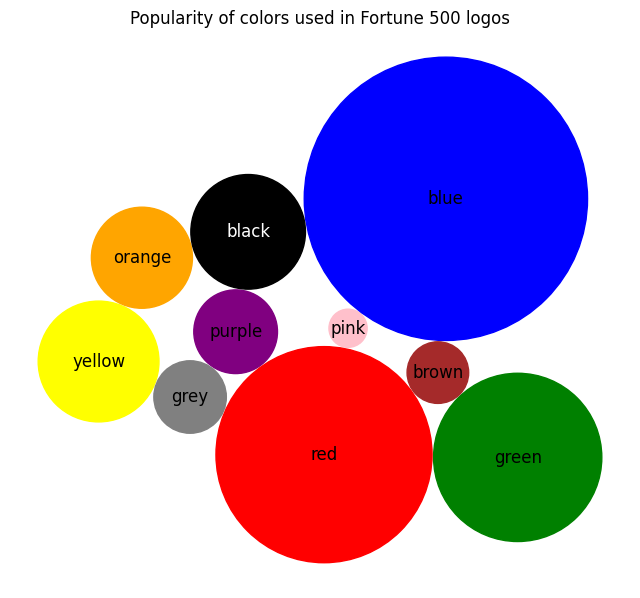

In [121]:
c_v = [f"{c}\n{int(x)}" for c, x in zip(browser_market_share["color_names"], browser_market_share["value"])]


bubble_chart = BubbleChart(area=browser_market_share['value'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8, 8))
bubble_chart.plot(ax, browser_market_share['value'], browser_market_share['color'], plot_values=False)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popularity of colors used in Fortune 500 logos')

plt.show()

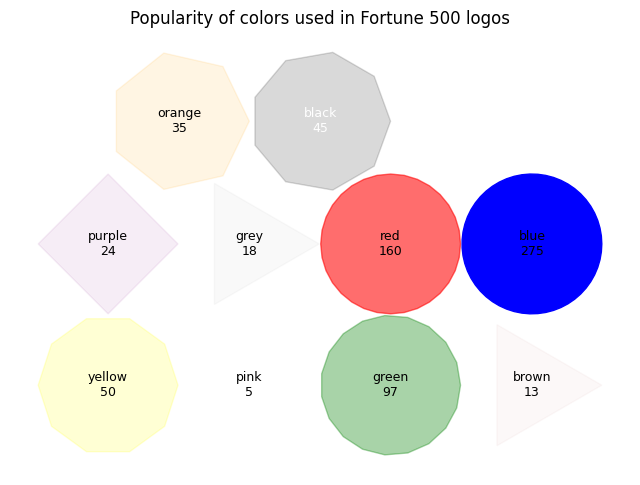

In [123]:
from matplotlib.patches import Polygon
import numpy as np

def plot_with_exact_polygons(self, ax, values, colors, color_override=None):
    # Normalize values for alpha representation
    norm_values = (values - np.min(values)) / (np.max(values) - np.min(values))
    
    for i, (x, y, r, value) in enumerate(self.bubbles):
        color = colors[i]
        label_color = 'white' if color == 'black' and color_override is None else 'black'
        
        # Use value as the exact number of sides
        num_sides = max(int(value / 5), 3)  # Ensure at least a triangle
        # Adjust alpha based on normalized value if uniform_size is True
        alpha = norm_values[i] if self.uniform_size else 1.0
        
        # Generate polygon vertices
        angles = np.linspace(0, 2 * np.pi, num_sides, endpoint=False)
        
        #print(values, angles)
        
        vertices = np.vstack([x + r * np.cos(angles), y + r * np.sin(angles)]).T
        
        polygon = Polygon(vertices, closed=True, color=color if color_override is None else color_override, alpha=alpha)
        ax.add_patch(polygon)
        ax.text(x, y, f"{color}\n{str(int(value))}", color=label_color, ha='center', va='center', fontsize=9 if self.uniform_size else 12)

# Assuming `area`, `values`, and `colors` are already defined and you have an instance of BubbleChart:
# Replace BubbleChart.plot method with the new one
BubbleChart.plot = plot_with_exact_polygons

# Example usage:
# fig, ax = plt.subplots()
# bubble_chart = BubbleChart(area=[value for value in browser_market_share['value']])
# bubble_chart.plot(ax, browser_market_share['value'], browser_market_share['color'])
# plt.show()



c_v = [f"{c}\n{int(x)}" for c, x in zip(browser_market_share["color_names"], browser_market_share["value"])]


bubble_chart = BubbleChart(area=browser_market_share['value'],
                           bubble_spacing=0.1, uniform_size=True)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8, 8))
bubble_chart.plot(ax, browser_market_share['value'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popularity of colors used in Fortune 500 logos')

plt.show()

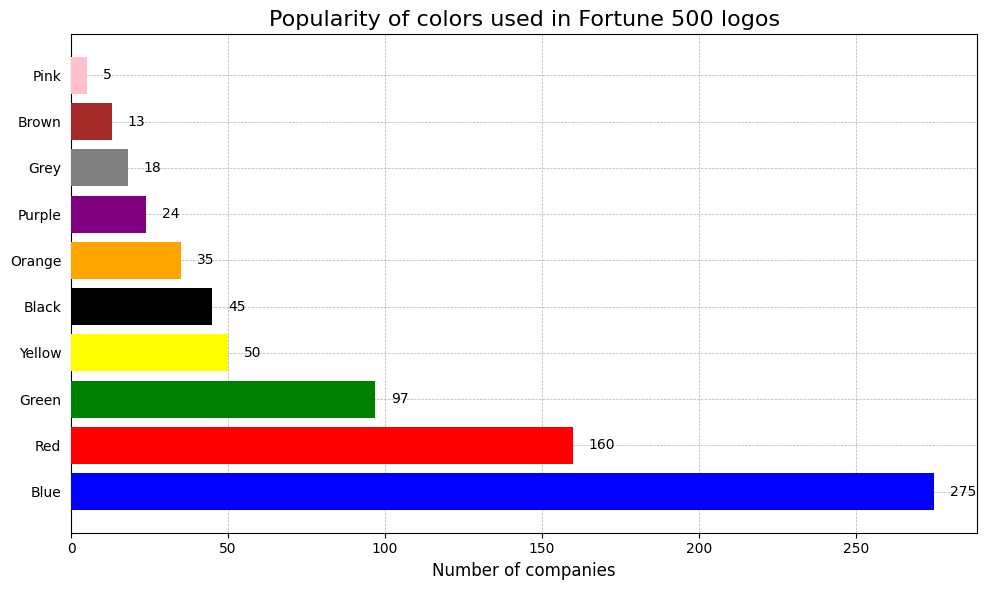

In [127]:
import matplotlib.pyplot as plt

browser_market_share = {
    'color_names': ['Blue', 'Red', 'Green', 'Yellow', 'Black', 'Orange', 'Purple', 'Grey', 'Brown', 'Pink'],
    'value': [275, 160, 97, 50, 45, 35, 24, 18, 13, 5],
    'color': [c.lower() for c in ['Blue', 'Red', 'Green', 'Yellow', 'Black', 'Orange', 'Purple', 'Grey', 'Brown', 'Pink']]
}

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(browser_market_share['color_names'], browser_market_share['value'], color=browser_market_share['color'], zorder=3)

ax.set_xlabel('Number of companies', fontsize=12)
ax.set_title('Popularity of colors used in Fortune 500 logos', fontsize=16)

ax.tick_params(axis='y', which='both', left=False)
ax.grid(True, linestyle='--', linewidth=0.5, zorder=0)  # Make sure grid is behind the bars

for i, v in enumerate(browser_market_share['value']):
    ax.text(v + 5, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()
